# HR Dataset Analysis 

Adrienne Hill

12.4.2018

IS 685 

University of Nevada, Reno


# Introduction to Data, Motivation and Hypothesis

The human resources dataset used for this project is from Kaggle and has 10 attributes describing employee characteristics. There are 14,999 rows of data, and the dataset has been widely used online to model and predict employee turnover. However, I will use the attributes of the dataset to see if they are predictors of  "Promotion Last 5 Years" rather than employee turnover, aka "Left". Promotion within the last five years indicates the performance of an employee, whether high potential employees stay at the company and whether the company has made a worthwhile investment. I want to see if features in the dataset like employee satisfaction contribute to employee promotions since "People who like their job and who are proud of their company are generally more engaged, even if the work environment is stressful and pressure is high" (Vulpen, 2018).  

The goal of this analysis is to understand which features in the dataset contribute the greatest to employee promotion and to compare the performance of logistic regression, random forest and support vector machine in my analysis. I chose
these methods because they lend themselves well to modeling a binary feature and there are good examples of these methods from our class materials and online. I expect that the support vector machine model will outperform the other model because it is more tolerant of error and has a wider separating margin (Bhattacharyya, 2018) (Drakos, 2018).

# Cleaning and Exploratory Data Analysis

In [383]:
import pip
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import os

In [384]:
# pd.set_option('display.max_columns',15)

pd.reset_option('display.max_columns')

In [385]:
data = pd.read_csv('/Users/adriennehill/Library/Mobile Documents/com~apple~CloudDocs/Classes/IS685/IS 685 Project/HR_Data.csv') 
data.shape

(14999, 10)

In [386]:
df=data
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Finding Missing Data

In [388]:
def missingData (data):
    totalempty = data.isnull().sum().sort_values (ascending = False)
    percentempty = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    missing_data = pd.concat([totalempty, percentempty], axis =1, keys = ['TotalMissing', 'PercentMissing'])
    return missing_data

In [389]:
missingData(df)

,TotalMissing,PercentMissing
salary,0,0.0
department,0,0.0
promotion_last_5years,0,0.0
left,0,0.0
Work_accident,0,0.0
time_spend_company,0,0.0
average_montly_hours,0,0.0
number_project,0,0.0
last_evaluation,0,0.0
satisfaction_level,0,0.0


There aren't any missing data from the HR dataset--very clean! The data types are consistent and don't need to be corrected at this time. I will move on to exploratory data analysis. 

# Exploratory Data Analysis 

In [390]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


The mean satisfaction level is 0.61 which is lower than desired for most companies but above 0.5. The standard deviation is .25 which shows satisfaction level varies greatly in the company. 

Descriptive Data By Promotion In The Last 5 Years

In [391]:
promotiondescribe = df.groupby(['promotion_last_5years']).describe()

with pd.option_context('display.max_rows', 100, 'display.max_columns', 56):
    display(promotiondescribe)


Work_accident                                          \
                              count      mean       std  min  25%  50%  75%   
promotion_last_5years                                                         
0                           14680.0  0.142575  0.349651  0.0  0.0  0.0  0.0   
1                             319.0  0.238245  0.426679  0.0  0.0  0.0  0.0   

                           average_montly_hours                                \
                       max                count        mean        std    min   
promotion_last_5years                                                           
0                      1.0              14680.0  201.076431  49.981489   96.0   
1                      1.0                319.0  199.849530  48.203799  100.0   

                                                  last_evaluation            \
                         25%    50%    75%    max           count      mean   
promotion_last_5years                                                         
0                      156.0  200.0  245.0  310.0         14680.0  0.716321   
1                      156.0  206.0  243.0  292.0           319.0  0.706019   

                                                                  left  \
                            std   min    25%   50%   75%  max    count   
promotion_last_5years                                                    
0                      0.171201  0.36  0.560  0.72  0.87  1.0  14680.0   
1                      0.169632  0.37  0.575  0.71  0.84  1.0    319.0   

                                                                    \
                           mean       std  min  25%  50%  75%  max   
promotion_last_5years                                                
0                      0.241962  0.428286  0.0  0.0  0.0  0.0  1.0   
1                      0.059561  0.237044  0.0  0.0  0.0  0.0  1.0   

                      number_project                                          \
                               count      mean       std  min  25%  50%  75%   
promotion_last_5years                                                          
0                            14680.0  3.804155  1.236190  2.0  3.0  4.0  5.0   
1                              319.0  3.752351  1.054245  2.0  3.0  4.0  4.0   

                           satisfaction_level                                  \
                       max              count      mean       std   min   25%   
promotion_last_5years                                                           
0                      7.0            14680.0  0.611895  0.249281  0.09  0.44   
1                      6.0              319.0  0.656019  0.212489  0.11  0.52   

                                       time_spend_company                      \
                        50%   75%  max              count      mean       std   
promotion_last_5years                                                           
0                      0.64  0.82  1.0            14680.0  3.483719  1.437768   
1                      0.68  0.82  1.0              319.0  4.166144  2.161843   

                                                 
                       min  25%  50%  75%   max  
promotion_last_5years                            
0                      2.0  3.0  3.0  4.0  10.0  
1                      2.0  3.0  3.0  5.0  10.0

In [392]:
# Percentage of employee promoted in company
319/14680*100

2.173024523160763

By grouping 'promotion_last_5years' we can see the means of the other features and characteristics of 'promotion_last_5years'. 
* Only 2.17% of employees were promoted in the company.
* The average monthly hours between employees who received a promotion or not differs by less than two hours. 
* The average number of projects is slightly greater for those who did not receive a promotion though it may not be statistically significant. 
* The average satisfaction level among this with a promotion is slightly greater than those without a promotion; Are employees more satisfied when they have been promoted or are those who are more satisfied more likely to seek a promotion? Just a thought. 
* The average time spent at the company for employees who received a promotion is 4.17 years and 3.48 years for employees who did not. This makes sense since time and experience result in seniority, however, even a promotion doesn't prevent the large attrition that occurs after 5 years as was seen in the histogram earlier. 

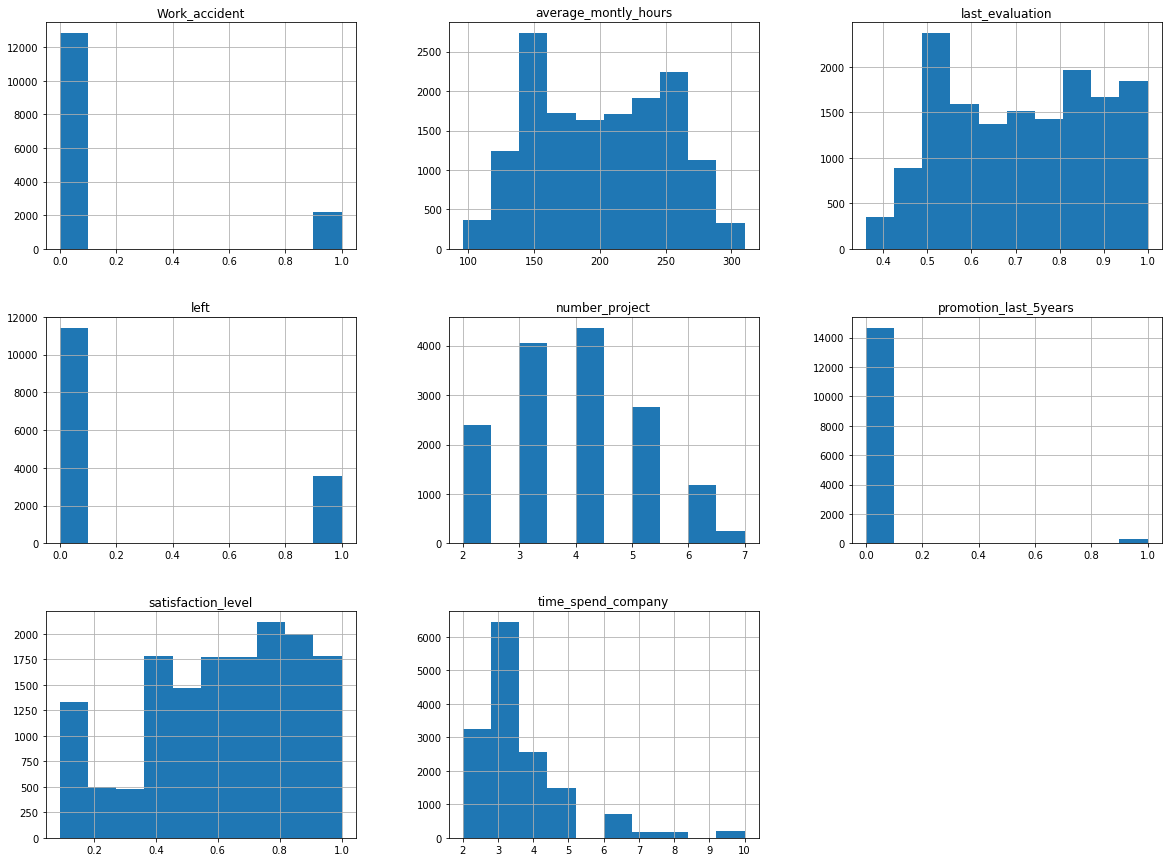

In [393]:
num_bins = 10 

df.hist(bins= num_bins, figsize = (20,15))
plt.savefig('HR_Histogram_Plots')
plt.show()

Notes: From the histograms, we see that employee satisfaction level is left skewed and the mean is less than the median. Employee satisfaction does seem to skew high or over 0.5. Very few people were promoted in the last five years which I believe could depress employee satisfaction and could make promotion harder to predict. The time spent at the company is right skewed, so the mean is greater than the median and the company has a hard time retaining employees for over five years. 

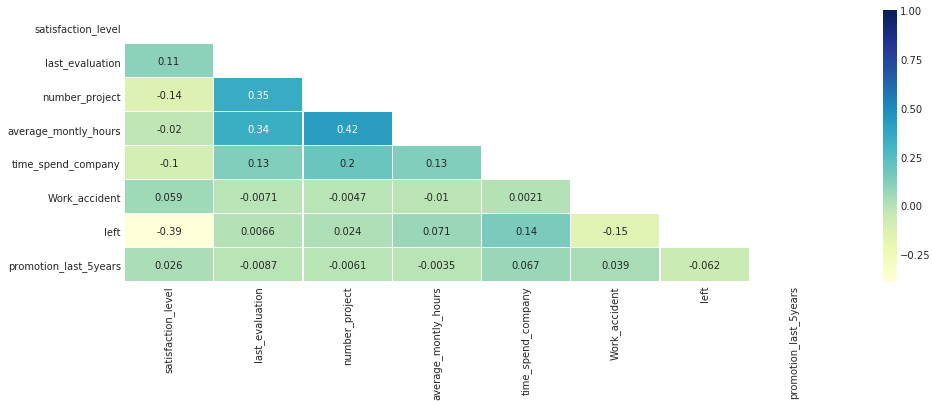

In [394]:
corr_matrix = df.corr()
corr = np.corrcoef(df.corr())
mask = np.zeros_like (corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(16,5))
with sns.axes_style('white'):
    sns.heatmap(corr_matrix, mask= mask, annot = True, linewidths= .3, cmap = 'YlGnBu')
plt.savefig('HR_Correlation_Matrix')

plt.show()

* The correlation Matrix shows that there are few strong correlations between the features. Average monthly hours and number of projects have the strongest correlation at 0.42 which is still low. 
* The strongest correlation with satisfaction level is Left at -0.39 followed by last evaluation at 0.11.  
* The strongest correlation with promotion in the last five years is time spent at the company at 0.067--an obvious correlation but still a weak correlation!

Text(0.5,0.98,'Satisfaction level Vs Promotion')

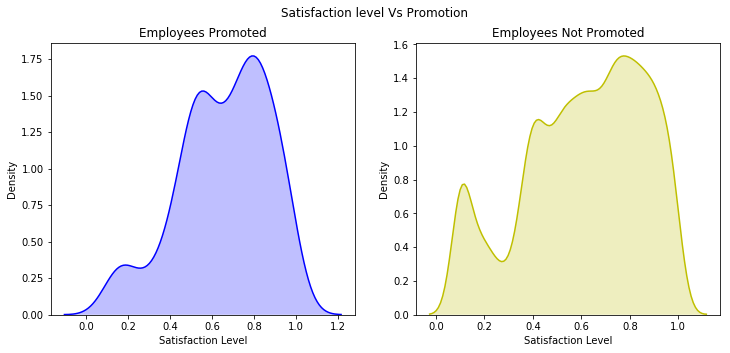

In [395]:
fig,ax=plt.subplots(ncols=2,figsize=(12,5))
NoPromotion=df[df.promotion_last_5years==0]
Promotion=df[df.promotion_last_5years==1]
sns.kdeplot(Promotion.satisfaction_level,shade=True,color="b",ax=ax[0],legend=False)
ax[0].set_xlabel("Satisfaction Level")
ax[0].set_ylabel("Density")
ax[0].set_title("Employees Promoted")
sns.kdeplot(NoPromotion.satisfaction_level,shade=True,color="y",ax=ax[1],legend=False)
ax[1].set_xlabel("Satisfaction Level")
ax[1].set_ylabel('Density')
ax[1].set_title('Employees Not Promoted')
plt.suptitle("Satisfaction level Vs Promotion",fontsize=12)

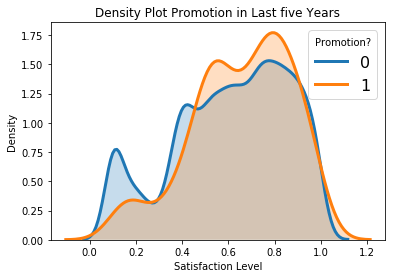

In [396]:
# List the Promotion Variables
Promo = [0, 1]

# Iterate through the five airlines
for Promoted in Promo:
    # Subset to the airline
    subset = df[df['promotion_last_5years'] == Promoted]
    
    # Draw the density plot
    sns.distplot(subset['satisfaction_level'], hist = False, kde = True,
                 kde_kws = {'shade': True,'linewidth': 3},
                 label = Promoted)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Promotion?')
plt.title('Density Plot Promotion in Last five Years')
plt.xlabel('Satisfaction Level')
plt.ylabel('Density')
plt.savefig('HR_Satisfaction_Level_Density_Plot')

In [397]:
sf1= data['satisfaction_level'].loc[data['promotion_last_5years']==1]
sf1.shape

(319,)

In [398]:
sf0= data['satisfaction_level'].loc[data['promotion_last_5years']==0]
sf0.shape

(14680,)

In [399]:
from scipy import stats
from math import sqrt
from scipy.stats import t

# Run independent t-test
ind_t_test = stats.ttest_ind(sf1, sf0, equal_var = False)

# Calculate the mean difference and 95% confidence interval
N1 = 319
N0 = 14680
df = (N0 + N1 - 2)
std1 = sf1.std()
std0 = sf0.std()
std_N1N0 = sqrt( ((N1 - 1)*(std1)**2 + (N0 - 1)*(std0)**2) / df) 

diff_mean = sf0.mean() - sf1.mean()
MoE = t.ppf(0.975, df) * std_N1N0 * sqrt(1/N0 + 1/N1)

print('The results of the independent t-test are: \n\tt-value = {:4.3f}\n\tp-value = {:4.3f}'.format(ind_t_test[0],ind_t_test[1]))
print ('\nThe difference between groups is {:3.1f} [{:3.1f} to {:3.1f}] (mean [95% CI])'.format(diff_mean, diff_mean - MoE, diff_mean + MoE))


The results of the independent t-test are: 
	t-value = 3.655
	p-value = 0.000

The difference between groups is -0.0 [-0.1 to -0.0] (mean [95% CI])


The density plot between promotion and satisfaction show that the distribution for employees who received a promotion is more concentrated from 0.6 through 0.8 satisfaction level whereas the distribution for employees who didn't receive a promotion has two peaks around 0.1 and 0.6 through 0.8 satisfaction level. The density graphs overlap quite a bit which I initially thought would result in the two groups being statistically the same, however, the two groups are statistically different according to the independent t-test I ran.

The p-value is significant and we can reject the null hypothesis that employees who received a promotion have the same satisfaction level than those who didn't. The results of the t-test support the alternative hypothesis that employees who received a promotion have a different satisfaction level than those who didn't. 

Text(0.5,0.98,'Years at Company Vs Promotion')

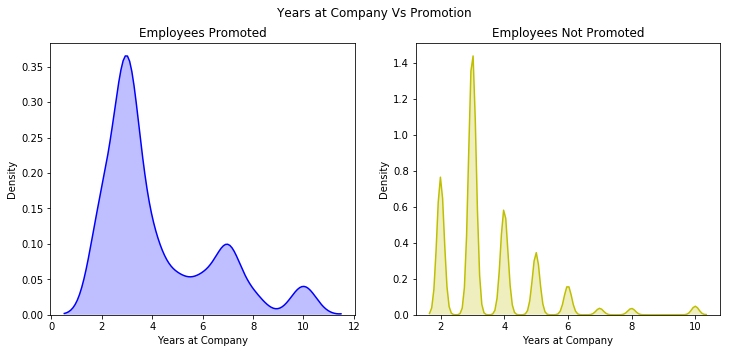

In [402]:
df = data

fig,ax=plt.subplots(ncols=2,figsize=(12,5))
NoPromotion=df[df.promotion_last_5years==0]
Promotion=df[df.promotion_last_5years==1]
sns.kdeplot(Promotion.time_spend_company,shade=True,color="b",ax=ax[0],legend=False)
ax[0].set_xlabel("Years at Company")
ax[0].set_ylabel("Density")
ax[0].set_title("Employees Promoted")
sns.kdeplot(NoPromotion.time_spend_company,shade=True,color="y",ax=ax[1],legend=False)
ax[1].set_xlabel("Years at Company")
ax[1].set_ylabel('Density')
ax[1].set_title('Employees Not Promoted')
plt.suptitle("Years at Company Vs Promotion",fontsize=12)

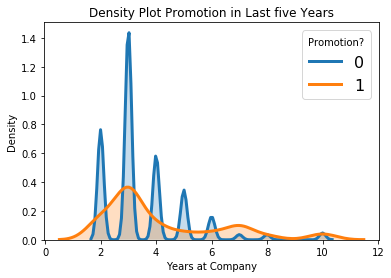

In [403]:
# List the Promotion Variables
Promo = [0, 1]

# Iterate through the five airlines
for Promoted in Promo:
    # Subset to the airline
    subset = df[df['promotion_last_5years'] == Promoted]
    
    # Draw the density plot
    sns.distplot(subset['time_spend_company'], hist = False, kde = True,
                 kde_kws = {'shade': True,'linewidth': 3},
                 label = Promoted)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Promotion?')
plt.title('Density Plot Promotion in Last five Years')
plt.xlabel('Years at Company')
plt.ylabel('Density')
plt.savefig('HR_Year_At_Company_Density_Plot')

In [404]:
Y1= data['time_spend_company'].loc[data['promotion_last_5years']==1]
Y1.shape

(319,)

In [405]:
Y0= data['time_spend_company'].loc[data['promotion_last_5years']==0]
Y0.shape

(14680,)

In [406]:
from scipy import stats
from math import sqrt
from scipy.stats import t

# Run independent t-test
ind_t_test = stats.ttest_ind(Y1, Y0, equal_var = False)

# Calculate the mean difference and 95% confidence interval
YN1 = 319
YN0 = 14680
df = (YN0 + YN1 - 2)
stdY1 = Y1.std()
stdY0 = Y0.std()
std_Y1Y0 = sqrt( ((YN1 - 1)*(stdY1)**2 + (YN0 - 1)*(stdY0)**2) / df) 

diff_mean = Y0.mean() - Y1.mean()
MoE = t.ppf(0.975, df) * std_Y1Y0 * sqrt(1/YN0 + 1/YN1)

print('The results of the independent t-test are: \n\tt-value = {:4.3f}\n\tp-value = {:4.3f}'.format(ind_t_test[0],ind_t_test[1]))
print ('\nThe difference between groups is {:3.1f} [{:3.1f} to {:3.1f}] (mean [95% CI])'.format(diff_mean, diff_mean - MoE, diff_mean + MoE))


The results of the independent t-test are: 
	t-value = 5.611
	p-value = 0.000

The difference between groups is -0.7 [-0.8 to -0.5] (mean [95% CI])


The density plots between promotion and years at company show that the distribution for employees who received a promotion is more concentrated from 2 to four years at the company whereas the distribution for employees who didn't receive a promotion has peaks strong peaks at years 2, 3 and 4 years and then tapers off. The density graphs overlap less than satisfaction which means there is more to differentiate employees who received a promotion and those who didn't by years at the company, but this is not surprising nor very insightful. 

I ran an independent t-test on the two groups and found that the two groups are statistically different. The p-value is statistically significant and we can reject the null hypothesis that the years at the company for those who received a promotion in the last five years and those who did not are the same. 

# ECDFs  

ECDF for Satisfaction Level

In [410]:
df= data
# Percentile Calculation
percentiles = np.array([2.5, 25, 50, 75, 97.5])

ptiles_amount = np.percentile(df['satisfaction_level'], percentiles)
print('Percenitle Satisfaction Level: {}'.format(ptiles_amount))

Percenitle Satisfaction Level: [0.1  0.44 0.64 0.82 0.98]


In [411]:
# ECDF for satisfaction 

def ecdf(df):
    n = len(df)
    x = np.sort(df)
    y = np.arange (1, n+1) / n
    
    return x, y 

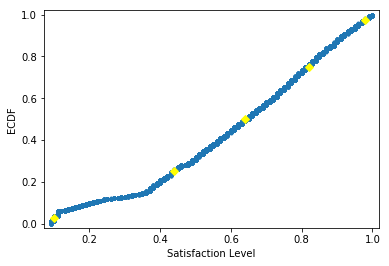

<Figure size 432x288 with 0 Axes>

In [412]:
# Compute ECDF for Satisfaction Level
x, y = ecdf(df['satisfaction_level'])

3# Generate Plot
_ = plt.plot(x, y, marker = '.', linestyle = 'none')

plt.margins(0.02)

_= plt.plot(ptiles_amount, percentiles/100, marker = 'D', color = 'yellow', linestyle = 'none')

_= plt.xlabel('Satisfaction Level')
_= plt.ylabel('ECDF')

plt.show()
plt.savefig('HR_Satisfaction_ECDF')

The ECDF for Satisfaction Level shows how employee satisfaction is stratified; 25% of employees' satisfaction level is around .45 or less and 75% of employees'satisfaction level is around .85 or less. The first quartile of employee's satisfaction is flat and then increases steadily afterward. 

ECDF for Time Spent at Company

In [413]:
# Percentile Calculation
percentiles = np.array([2.5, 25, 50, 75, 97.5])

ptiles_amount = np.percentile(df['time_spend_company'], percentiles)
print('Percenitle Time Spent at Company Level: {}'.format(ptiles_amount))

Percenitle Time Spent at Company Level: [2. 3. 3. 4. 8.]


In [414]:
# ECDF for satisfaction 

def ecdf(df):
    n = len(df)
    x = np.sort(df)
    y = np.arange (1, n+1) / n
    
    return x, y 

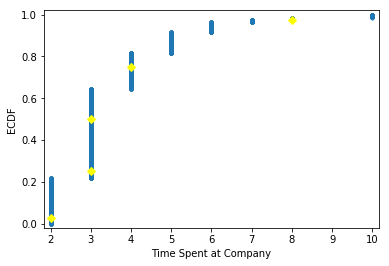

<Figure size 432x288 with 0 Axes>

In [415]:
# Compute ECDF for Satisfaction Level
x, y = ecdf(df['time_spend_company'])

3# Generate Plot
_ = plt.plot(x, y, marker = '.', linestyle = 'none')

plt.margins(0.02)

_= plt.plot(ptiles_amount, percentiles/100, marker = 'D', color = 'yellow', linestyle = 'none')

_= plt.xlabel('Time Spent at Company')
_= plt.ylabel('ECDF')

plt.show()
plt.savefig('HR_Time_Spent_ECDF')

The ECDF for Time Spent at Company shows 75% of employees have spent less than four years at the company and only 25% of employees have more than four years at the company.

ECDF for Average Monthly Hours

In [416]:
# Percentile Calculation
percentiles = np.array([2.5, 25, 50, 75, 97.5])

ptiles_amount = np.percentile(df['average_montly_hours'], percentiles)
print('Percenitle Average Monthly Hours Level: {}'.format(ptiles_amount))

Percenitle Average Monthly Hours Level: [118. 156. 200. 245. 286.]


In [417]:
# ECDF for satisfaction 

def ecdf(df):
    n = len(df)
    x = np.sort(df)
    y = np.arange (1, n+1) / n
    
    return x, y 

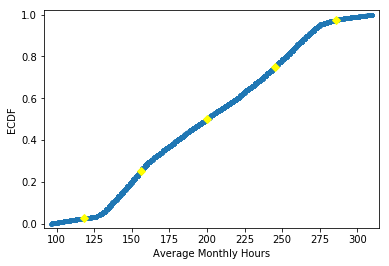

<Figure size 432x288 with 0 Axes>

In [418]:
# Compute ECDF for Satisfaction Level
x, y = ecdf(df['average_montly_hours'])

3# Generate Plot
_ = plt.plot(x, y, marker = '.', linestyle = 'none')

plt.margins(0.02)

_= plt.plot(ptiles_amount, percentiles/100, marker = 'D', color = 'yellow', linestyle = 'none')

_= plt.xlabel('Average Monthly Hours')
_= plt.ylabel('ECDF')

plt.show()
plt.savefig('HR_Monthly_Hours_ECDF')

The ECDF for Average Monthly Hours shows how half of the employees work than more than 200 hours a month and a half work less than 200 hours a month. Average monthly working hours range from 160-185 hours depending on the month, so most employees are working over 40 hour weeks. 

# PCA Principal Component Analysis

There aren't strong correlations between my chosen target feature and other features in the dataset so I will perform PCA to reduce the dimensionality and find the principal components in the dataset. I did this use a pipeline function and a second method using eigenvalues which "explain the variance of the data along the new feature axes" (Raschka, 2015). I then used the eigenvalues to plot the explained variance of the values.

In [419]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression as LR
import matplotlib.pyplot as plt

In [420]:
# Separating out the features
X = data.loc[:, ['satisfaction_level','last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]

In [421]:
# Separating out the target
y = df.loc[:,['promotion_last_5years']].values

In [422]:
# Make X a DataFrame
df_x = pd.DataFrame(X,)
# Make y a DataFrame
df_y = pd.DataFrame(y, columns=['promotion_last_5years'])
# Concatenate them together
df = pd.concat([df_x, df_y], axis = 1)
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,promotion_last_5years
0,0.38,0.53,2,157,3,0
1,0.80,0.86,5,262,6,0
2,0.11,0.88,7,272,4,0
3,0.72,0.87,5,223,5,0
4,0.37,0.52,2,159,3,0


In [423]:
# Create scaler: scaler
scaler = StandardScaler()

In [424]:
# Create a PCA instance: pca
pca = PCA()

In [425]:
# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

In [426]:
# Fit the pipeline to HR DF above
pipeline.fit(df)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

In [427]:
print(pca.components_)

[[-0.08661249  0.50724217  0.57890828  0.5491243   0.31370648  0.0109369 ]
 [-0.81774884 -0.37033704  0.106784   -0.12913349  0.39915682  0.08205403]
 [ 0.2409124   0.0142902  -0.09657111 -0.07528916  0.32177568  0.90731636]
 [ 0.32790084  0.06733132 -0.19113335 -0.25110652  0.78817534 -0.40882848]
 [-0.2763131   0.71193933 -0.00128488 -0.63210154 -0.12044203  0.05227982]
 [ 0.28614408 -0.30652984  0.77948881 -0.46207332 -0.05473429 -0.00711564]]


In [428]:
print(pca.explained_variance_)

[1.82986719 1.10980401 1.03158507 0.84593482 0.63410949 0.54909947]


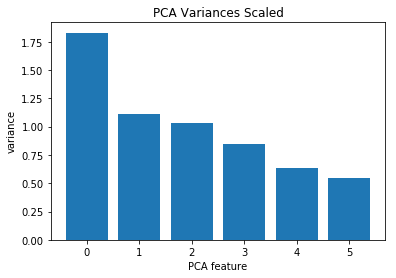

In [429]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.title('PCA Variances Scaled')
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

PCA Interpretation

Scaling and PCA feature selection show us one or two components will give us the intrinsic value of the dataset as opposed to three or more.

# Eigenvectors and Eigenvalues


PCA analysis can be reinforced with eigenvectors and eigenvalues which "determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes" (Raschka, 2015).

In [430]:
# Separating out the features
X = df.loc[:, ['satisfaction_level','last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]

In [431]:
# Separating out the target
y = df.loc[:,['promotion_last_5years']].values

In [432]:
# Standardizing the features
X_std = StandardScaler().fit_transform(df)

In [433]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00006668  0.10502822 -0.14297912 -0.02004945 -0.1008728   0.02560689]
 [ 0.10502822  1.00006668  0.34935588  0.33976445  0.1315995  -0.00868435]
 [-0.14297912  0.34935588  1.00006668  0.41723845  0.19679901 -0.00606436]
 [-0.02004945  0.33976445  0.41723845  1.00006668  0.12776343 -0.00354465]
 [-0.1008728   0.1315995   0.19679901  0.12776343  1.00006668  0.06743742]
 [ 0.02560689 -0.00868435 -0.00606436 -0.00354465  0.06743742  1.00006668]]


In [434]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00006668  0.10502822 -0.14297912 -0.02004945 -0.1008728   0.02560689]
 [ 0.10502822  1.00006668  0.34935588  0.33976445  0.1315995  -0.00868435]
 [-0.14297912  0.34935588  1.00006668  0.41723845  0.19679901 -0.00606436]
 [-0.02004945  0.33976445  0.41723845  1.00006668  0.12776343 -0.00354465]
 [-0.1008728   0.1315995   0.19679901  0.12776343  1.00006668  0.06743742]
 [ 0.02560689 -0.00868435 -0.00606436 -0.00354465  0.06743742  1.00006668]]


In [435]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.08661249  0.28614408 -0.2763131  -0.32790084 -0.81774884  0.2409124 ]
 [-0.50724217 -0.30652984  0.71193933 -0.06733132 -0.37033704  0.0142902 ]
 [-0.57890828  0.77948881 -0.00128488  0.19113335  0.106784   -0.09657111]
 [-0.5491243  -0.46207332 -0.63210154  0.25110652 -0.12913349 -0.07528916]
 [-0.31370648 -0.05473429 -0.12044203 -0.78817534  0.39915682  0.32177568]
 [-0.0109369  -0.00711564  0.05227982  0.40882848  0.08205403  0.90731636]]

Eigenvalues 
[1.82986719 0.54909947 0.63410949 0.84593482 1.10980401 1.03158507]


In [436]:
cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.08661249  0.28614408 -0.2763131  -0.32790084 -0.81774884  0.2409124 ]
 [-0.50724217 -0.30652984  0.71193933 -0.06733132 -0.37033704  0.0142902 ]
 [-0.57890828  0.77948881 -0.00128488  0.19113335  0.106784   -0.09657111]
 [-0.5491243  -0.46207332 -0.63210154  0.25110652 -0.12913349 -0.07528916]
 [-0.31370648 -0.05473429 -0.12044203 -0.78817534  0.39915682  0.32177568]
 [-0.0109369  -0.00711564  0.05227982  0.40882848  0.08205403  0.90731636]]

Eigenvalues 
[1.82974519 0.54906286 0.63406721 0.84587842 1.10973002 1.03151629]


In [437]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.8297451888769882
1.1097300227034586
1.0315162930425443
0.8458784190736656
0.6340672136415012
0.5490628626618415


Eigenvalues are another way to analyze features. Eigenvalues show how much information each eigenvector contains. As the scores descend, each vector contains less information about the distribution of the data and you should only choose the top eigenvalues or top features. The top eigenvalues in this list are the top two.

Cumulative Explained Variance Plot

In [438]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

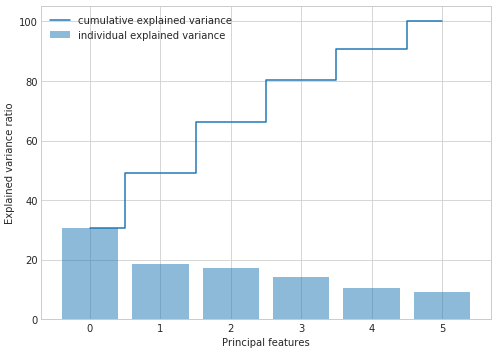

In [439]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(7, 5))

    plt.bar(range(6), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(6), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal features')
    plt.legend(loc='best')
    plt.tight_layout()

The explained variance plot shows that one feature explains a little over 30% of the variance or information in the model, a second feature explains around 20% and a third component explains around 15%. The variance for the third feature and on explains less of the variance. The cumulative variance plot shows two to three components are just as useful as using four or five components/features. 

# Creating Dummy Variables for Categorical Variables 

In order to add categorical variables to a model, I will need to create dummy variables for salary and department.

In [440]:
cat_vars=['salary','department']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data.join(cat_list)

In [441]:
dummies1 = pd.get_dummies(data['department']).rename(columns=lambda x: 'Department_' + str(x))
dummies2 = pd.get_dummies(data['salary']).rename(columns=lambda x: 'Salary_' + str(x))

hr = pd.concat([df, dummies1, dummies2], axis=1)      
#step_1.drop(['dummy', 'c'], inplace=True, axis=1)
hr.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company',
       'promotion_last_5years', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng',
       'Department_sales', 'Department_support', 'Department_technical',
       'Salary_high', 'Salary_low', 'Salary_medium'], dtype=object)

In [442]:
hr_vars=hr.columns.values.tolist()
y=['promotion_last_5years']
X=[i for i in hr_vars if i not in y]

In [443]:
X

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Department_IT',
 'Department_RandD',
 'Department_accounting',
 'Department_hr',
 'Department_management',
 'Department_marketing',
 'Department_product_mng',
 'Department_sales',
 'Department_support',
 'Department_technical',
 'Salary_high',
 'Salary_low',
 'Salary_medium']

# Feature Selection

I am now going to choose the most important features using the feature selection feature from sklearn, and the most important features will be given a "True" designation with rfe.support and "1" ranking with rfe.ranking. I chose to only use two features because of the results from my PCA tests which showed most variance could be explained with 2-3 features. 

In [444]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

rfe = RFE(model, 2)
rfe = rfe.fit(hr[X], hr[y])
print(rfe.support_)
print(rfe.ranking_)

/Users/adriennehill/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False False False False False False False  True False  True
 False False False False False False]
[ 8  7 16 17 14  2  9 13 15  1  6  1 12  4  5 11  3 10]


In [445]:
ranking = rfe.ranking_

In [446]:
",".join(map(str,ranking))

'8,7,16,17,14,2,9,13,15,1,6,1,12,4,5,11,3,10'

In [447]:
[i for i, x in enumerate(ranking,1) if x==1]

[10, 12]

In [448]:
cols = [ 'Department_management',
 'Department_product_mng']

X = hr[cols]
y = hr['promotion_last_5years']

According to RFE, the product management and management department are the most important features for promotion in the last 5 years. This surprised me since I wasn't able to use the categorical variables in some of the EDA including the correlation matrix and the PC analysis. I will use these departments for my X in the following tests.  

 # Logistic Regression

In [449]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [450]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.944


# Random Forest Classifier

In [451]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [452]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.944


# Support Vector Machine

In [453]:
from sklearn.svm import SVC
svc = SVC(class_weight='balanced')
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [454]:
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))

Support vector machine accuracy: 0.944


# Model Analysis

I chose logistic regression, random forest and support vector machine because they lend themselves well to modeling a binary feature and there are good examples of these methods from our class materials and online. 

I used 40% of my data for the test set because I felt that a larger test set was appropriate given there are very few employees who received a promotion. It appears that logistic regression, random forest and support vector machine have the same, very good accuracy, however, this could be deceiving so I will continue with cross-validation, precision and recall and a ROC curve. I also changed the class weight in sklearn because the number of employees promoted is dwarfed by those who weren't. Changing the weight to "balanced" replicates the occurrences of promotion until they are comparable to no promotion (Mueller, 2018).

# Cross-Validation

In [455]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(class_weight='balanced')
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross-validation average accuracy: %.3f" % (results.mean()))

10-fold cross-validation average accuracy: 0.947


In [456]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier(class_weight='balanced')
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross-validation average accuracy: %.3f" % (results.mean()))

10-fold cross-validation average accuracy: 0.947


In [457]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = SVC(class_weight='balanced')
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross-validation average accuracy: %.3f" % (results.mean()))

10-fold cross-validation average accuracy: 0.947


Cross-validation tries to prevent over-fitting by testing many portions or folds of the dataset. I chose cross-validation because to test whether or not the data is overfitting in the three models because their accuracy is very high. The accuracy actually increased with cross-validation which shows the the models are not necessarily overfitting but more investigation is required. 

# Precision and Recall 

Cross-validation was not enough in determining if logistic regression, random forest and SVM are truly able to predict if employees will be promoted given my dependent variables, therefore, I am using precision and recall and graphing them in a confusion matrix to see how many true positives there are. It's important to know if the accuracy is reflecting the correct prediction of employee promotion--an uncommon event in the dataset.

In [458]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

             precision    recall  f1-score   support

          0       0.98      0.96      0.97      5863
          1       0.11      0.20      0.14       137

avg / total       0.96      0.94      0.95      6000



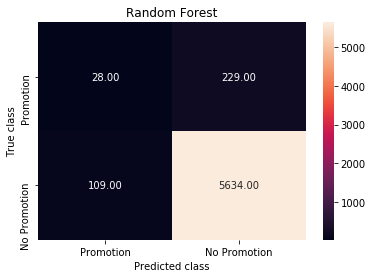

In [459]:
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Promotion", "No Promotion"] , yticklabels = ["Promotion", "No Promotion"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

In [460]:
print(classification_report(y_test, logreg.predict(X_test)))

             precision    recall  f1-score   support

          0       0.98      0.96      0.97      5863
          1       0.11      0.20      0.14       137

avg / total       0.96      0.94      0.95      6000



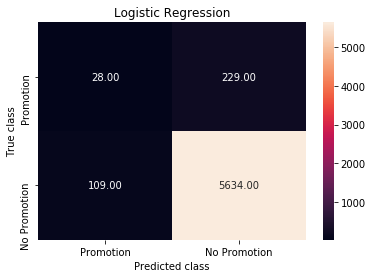

In [461]:
logreg_y_pred = logreg.predict(X_test)
logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_test, [1,0])
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Promotion", "No Promotion"] , yticklabels = ["Promotion", "No Promotion"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')

In [462]:
print(classification_report(y_test, svc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.98      0.96      0.97      5863
          1       0.11      0.20      0.14       137

avg / total       0.96      0.94      0.95      6000



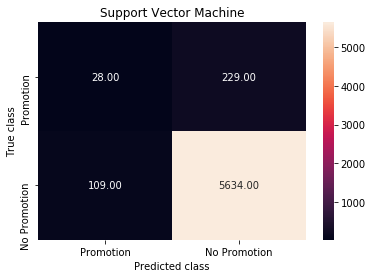

In [463]:
svc_y_pred = svc.predict(X_test)
svc_cm = metrics.confusion_matrix(svc_y_pred, y_test, [1,0])
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["Promotion", "No Promotion"] , yticklabels = ["Promotion", "No Promotion"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.savefig('support_vector_machine')

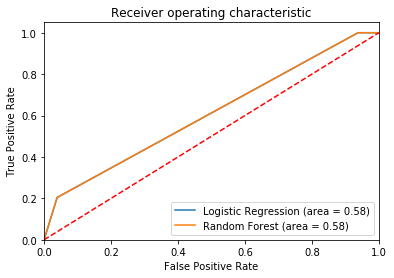

In [464]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

The precision and recall of the dataset showed that all three testing methods almost completely miss employees who received a promotion. The ROC curves for logistic regression and random forest show that they have little predictive power. In fact, the ROC area is .58 for both of tests which is only slightly better than chance.  

#  Model Evaluation

I want to understand the underlying data for the two departments chosen as my predictor features. I use a function to find the misclassified samples below and see that no employees in the Product Managment Department were promoted. I also looked in the dataset and saw that no one from the Product Managment Department was promoted, so it's doubtful that the Product Managment Department is helpful in predicting promotion. 229 employees in the management department who received a promotion were misclassified. 

In [465]:
misclassified_samples = X_test[y_test != y_pred]
misclassified_samples

,Department_management,Department_product_mng
10233,1,0
8610,1,0
11577,1,0
9163,1,0
5036,0,0
6952,1,0
14826,1,0
13611,0,0
13427,0,0
11350,1,0


In [466]:
misclassified_samples['Department_management'].value_counts()

1    229
0    109
Name: Department_management, dtype: int64

# Conclusion and Further Development

My models to predict employee promotion in the last five years had great accuracy and abysmal precision. Precision shows the percentage of your data that correctly classifies true positives; my models failed to classify employees who were promoted most of the time so precision was 11%. This project ought to be trashed and a variety of changes could be made:
* Although feature selection pointed to two departments that predict promotion best, we should explore other variables especially non-categorical variables and test those. I would like to see how employee satisfaction and the number of projects act as the predictor variables. 
* I used class weight balancing which improved precision but it could be worth-while to increase the threshold in the models from classifying employees who receive a promotion from the default .5 to a higher threshold. 
* It's possible that whether or not a promotion is received is dependent on a feature not collected in this dataset which means all models could result in poor precision regardless of the features and tools used in feature selection or tweaking the models. If this is the case, more research needs to be done on factors contributing to promotion and how those data should be collected. 

A human resources department or employee trying to determine what leads to promotion in this company would find the current data may not support prediction. There are so many factors that contribute to promotion in real life including the personalities of the supervisor and employee, budget constraints, company culture and company structure that capturing the features that conclusively lead to a promotion may be a fool's errand. The current model is not good enough to put money on. 

Descriptive feature analysis showed differences between features like employee satisfaction and years at the company between employees who receive a promotion and those who did not. Visualization methods like the correlation matrix and density plots also revealed useful characteristics of the features; proof that EDA is incredibly important and useful even when predictive models are not. 

This project showed that thorough data analysis and data science takes time, practice and may not ultimately lead to a fruitful predictive model. Issues like high bias or variance, low precision or recall, multicollinearity and over and underfitting have to be evaluated and fixed in a data science model. My model suffered from at least one of these issues if not more. 

I learned that there are so many tools you can use to transform, visualize and select features in python that it's best to stick with methods that are user-friendly and time efficient. I also learned that tools you use depend on your data; for example, when I was researching PCA, I found it was not the best way to reduce dimensionality for categorical values, and given more time, I would have explored methods like Factor Analysis of Mixed Data.

With more time, I would like to see what features contribute to employee satisfaction using a regression model and explore prediction of continuous variables in Python. Developing data science skills in Python would benefit HR practices by adding clarity and insight to recruitment, retention, promotion, offer and termination practices. 